In [334]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
print df.columns.values

Populating the interactive namespace from numpy and matplotlib
['Unnamed: 0' 'CAMIS' 'DBA' 'RESTAURANT' 'UNIQUE LOC' 'DBA.1' 'BORO'
 'BUILDING' 'STREET' 'ZIPCODE' 'PHONE' 'CUISINE DESCRIPTION'
 'INSPECTION DATE' 'ACTION' 'VIOLATION CODE' 'VIOLATION DESCRIPTION'
 'CRITICAL FLAG' 'SCORE' 'GRADE' 'GRADE DATE' 'RECORD DATE'
 'INSPECTION TYPE']


## Question 1: First 10 Restaurants

In [335]:
restaurants = df
restaurants['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']
restaurants[['RESTAURANT']][:10]

,RESTAURANT
0,WENDY'S 469 FLATBUSH AVENUE 11225
1,WENDY'S 469 FLATBUSH AVENUE 11225
2,WENDY'S 469 FLATBUSH AVENUE 11225
3,WENDY'S 469 FLATBUSH AVENUE 11225
4,WENDY'S 469 FLATBUSH AVENUE 11225
5,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


## Q2: Total number of restaurants

In [341]:
count = restaurants['RESTAURANT'].value_counts()
print "Total number of restaurents:", len(count)

Total number of restaurents: 10114


## Q3: Number of chains

In [343]:
rest_no_dupl = restaurants.drop_duplicates(subset='RESTAURANT')
num_businesses = rest_no_dupl['DBA'].value_counts()
mask = (num_businesses > 1)
num_chains = num_businesses[mask]
print "Number of chains:", len(num_chains)

Number of chains: 368


## Q4: Plot of top 20 chains

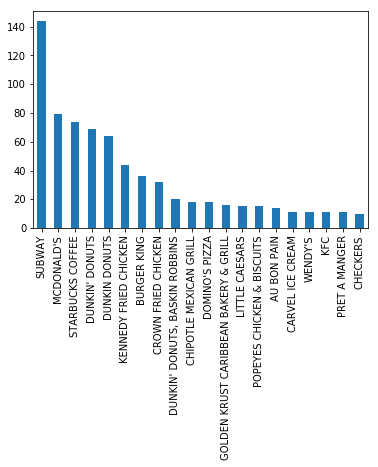

In [348]:
top_20_vc = num_chains[:20]
top_20_vc.plot(kind='bar')

## Q5: Fraction of restaurants that are chains

In [346]:
restaurants = rest_no_dupl['DBA'].isin(num_chains.index.values)
chains = rest_no_dupl[restaurants]
fr_chains = float(len(chains)) / float(len(rest_no_dupl))
print len(chains), "chains /", len(rest_no_dupl), "restaurants =", fr_chains*100, "%"

1666 chains / 10114 restaurants = 16.4722167293 %


## Q6: Number of businesses that are not chains, plotted by borough

In [347]:
nc_mask = (num_businesses == 1)
not_chains = num_businesses[nc_mask]

print len(not_chains), "non-chain restaurants"

8448 non-chain restaurants


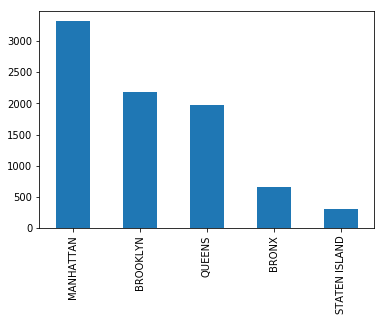

In [130]:
filter_missing = (not_chains['BORO'] == 'Missing')
indep = not_chains.loc[filter_missing, 'BORO'] = np.nan
not_chains['BORO'].value_counts().plot(kind='bar')

## Q7: Percentage of restaurants that are not chains, plotted by borough

AxesSubplot(0.125,0.125;0.775x0.755)


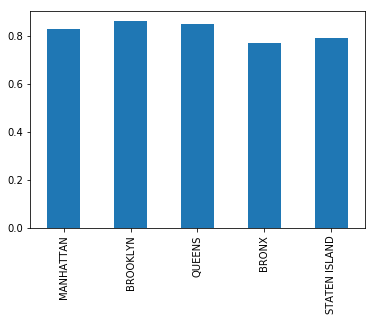

In [250]:
total_rest_by_boro = rest_no_dupl['BORO'].value_counts()
total_indep = not_chains['BORO'].value_counts()

#print total_rest_by_boro
#print total_indep

fract = total_indep / total_rest_by_boro

print fract.plot(kind='bar')

## Q8: Top 20 most popular cuisines

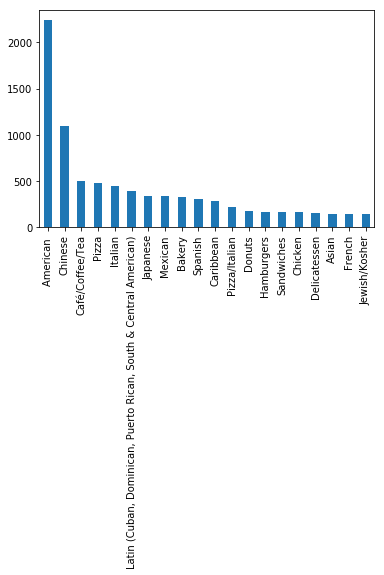

In [251]:
cuisine = rest_no_dupl['CUISINE DESCRIPTION'].value_counts()
top_20_cuisine = cuisine[:20]
top_20_cuisine.plot(kind='bar')

## Q9: Top 20 cuisines without citations

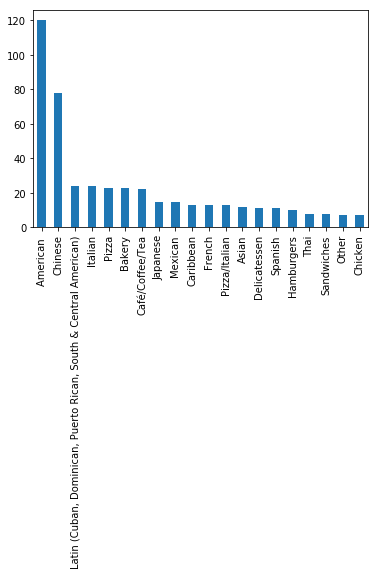

In [252]:
no_viol = df[['RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']]
no_viol = df[(df['VIOLATION CODE'].isnull())][['Restaurant','CUISINE DESCRIPTION']]
no_viol_unique = no_viol.drop_duplicates(subset='Restaurant')

clean_cuisines = no_viol_unique['CUISINE DESCRIPTION'].value_counts()

clean_20 = clean_cuisines[:20]
clean_20.plot(kind = "bar")

## Q10: Cleanest Top 10 cuisines

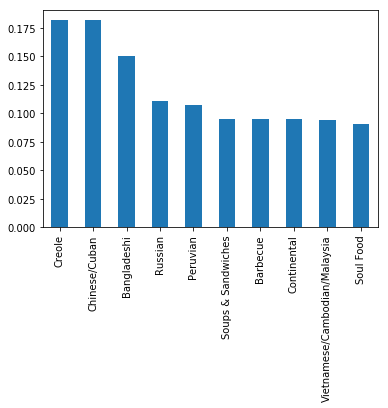

In [259]:
cuisine_all = df['CUISINE DESCRIPTION'].value_counts()
cuisine_20ormore = cuisine_all[cuisine_all >= 20]
cuisine20swapped = Series(cuisine_20ormore.index.values, index=cuisine_20ormore)
noviol20 = df[(df['VIOLATION CODE'].isnull() & df['CUISINE DESCRIPTION'].isin(cuisine20swapped))][['RESTAURANT', 'CUISINE DESCRIPTION']]
noviol20_unique = noviol20.drop_duplicates(subset='RESTAURANT')
all20 = df[df['CUISINE DESCRIPTION'].isin(cuisine20swapped)][['RESTAURANT', 'CUISINE DESCRIPTION']].drop_duplicates(subset='RESTAURANT')
ratio_clean = (noviol20_unique['CUISINE DESCRIPTION'].value_counts() / all20['CUISINE DESCRIPTION'].value_counts()).sort_values(ascending=False)
clean_10 = ratio_clean[:10]
clean_10.plot(kind = "bar")

## Q11: Most common violations per borough

In [279]:
boros = df['BORO'] != "Missing"
viol_per_boro = pd.crosstab(df['VIOLATION DESCRIPTION'][boros], df['BORO'][boros])
viol_per_boro.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

## Q12: Most common violations per borough after normalizing (two methods)

In [316]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
viol_per_boro_rel = viol_per_boro.apply(lambda rel: rel.map(float)/violationFrequency)
viol_per_boro_rel.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

In [321]:
viol_per_boro = pd.crosstab(df['VIOLATION DESCRIPTION'][boros], df['BORO'][boros], normalize='index')
viol_per_boro.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object